In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import scipy.stats as st

In [2]:
path = 'EmployeeAttrition.csv'
df = pd.read_csv(path)
df

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,2381060,2
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,-665480,2
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,2017-08-01,2788,30,Male,C27,Master,70254,2017-06-08,NaN,2,2,740280,3
19100,2017-09-01,2788,30,Male,C27,Master,70254,2017-06-08,NaN,2,2,448370,3
19101,2017-10-01,2788,30,Male,C27,Master,70254,2017-06-08,NaN,2,2,0,2
19102,2017-11-01,2788,30,Male,C27,Master,70254,2017-06-08,NaN,2,2,200420,2


In [3]:
# Confirm start and end dates of data set. Confirm number of employees.
print(df['Emp_ID'].nunique())
print(df['MMM-YY'].max())
print(df['MMM-YY'].min())

2381
2017-12-01
2016-01-01


In [4]:
# Get start date of each employee
gr_df = df.groupby('Emp_ID')
start_date = gr_df['Dateofjoining'].min()
start_date

Emp_ID
1       2015-12-24
2       2017-11-06
4       2016-12-07
5       2016-01-09
6       2017-07-31
           ...    
2784    2012-10-15
2785    2017-08-28
2786    2015-07-31
2787    2015-07-21
2788    2017-06-08
Name: Dateofjoining, Length: 2381, dtype: object

In [5]:
# Confirm where Na values are . . 


In [6]:
# Get finish date of each employee. If last day is blank, employee still here (Dec 2017). att_emp = df for attrition employees
att_emp = df.dropna()
len(att_emp)
att_emp = att_emp.reset_index()
att_emp.columns


Index(['index', 'MMM-YY', 'Emp_ID', 'Age', 'Gender', 'City', 'Education_Level',
       'Salary', 'Dateofjoining', 'LastWorkingDate', 'Joining Designation',
       'Designation', 'Total Business Value', 'Quarterly Rating'],
      dtype='object')

In [7]:
# ae_se = reduced df for attrition employees
ae_se = att_emp[['Emp_ID','LastWorkingDate']]
ae_se


,Emp_ID,LastWorkingDate
0,1,2016-03-11
1,4,2017-04-27
2,5,2016-03-07
3,8,2017-11-15
4,12,2016-12-21
...,...,...
1611,2779,2017-02-14
1612,2782,2016-08-16
1613,2785,2017-10-28
1614,2786,2016-09-22


In [8]:
# create new df to store information
# add employee name, columns for start date, finish date & tenure
new_df = pd.DataFrame(start_date)

new_df = new_df.reset_index()
new_df = pd.merge(new_df, ae_se, how='left', on=['Emp_ID'])
new_df['Tenure']=""
new_df

,Emp_ID,Dateofjoining,LastWorkingDate,Tenure
0,1,2015-12-24,2016-03-11,
1,2,2017-11-06,NaN,
2,4,2016-12-07,2017-04-27,
3,5,2016-01-09,2016-03-07,
4,6,2017-07-31,NaN,
...,...,...,...,...
2376,2784,2012-10-15,NaN,
2377,2785,2017-08-28,2017-10-28,
2378,2786,2015-07-31,2016-09-22,
2379,2787,2015-07-21,2016-06-20,


In [9]:
# Formula to calculate Tenure
# new_df['Current_Status'] = ''
# new_df['Current_status'] = new_df['Current_status'].fillna(1)


new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2381 entries, 0 to 2380
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Emp_ID           2381 non-null   int64 
 1   Dateofjoining    2381 non-null   object
 2   LastWorkingDate  1616 non-null   object
 3   Tenure           2381 non-null   object
dtypes: int64(1), object(3)
memory usage: 93.0+ KB


In [10]:
# If LastWorkingDate ==Nan current_status == 1. (this did not work - current status listed as 2 for all employees)
# else current
# new_df['Current_Status'] = new_df.loc[new_df['LastWorkingDate'] != 'NaN', 'Current_Status']=2

# new_df['LastWorkingDate'].value_counts()
# new_df

In [11]:
# Display whether employees have left the company with boolean values. (I couldn't work out the current status column)
test_status = pd.notnull(new_df['LastWorkingDate'])
new_df['Left_Company'] = test_status
new_df

,Emp_ID,Dateofjoining,LastWorkingDate,Tenure,Left_Company
0,1,2015-12-24,2016-03-11,,True
1,2,2017-11-06,NaN,,False
2,4,2016-12-07,2017-04-27,,True
3,5,2016-01-09,2016-03-07,,True
4,6,2017-07-31,NaN,,False
...,...,...,...,...,...
2376,2784,2012-10-15,NaN,,False
2377,2785,2017-08-28,2017-10-28,,True
2378,2786,2015-07-31,2016-09-22,,True
2379,2787,2015-07-21,2016-06-20,,True


In [12]:
# convert dates to datetime data type & save as series
start_date = pd.to_datetime(new_df['Dateofjoining'],yearfirst=True, errors='ignore')
start_date

0      2015-12-24
1      2017-11-06
2      2016-12-07
3      2016-01-09
4      2017-07-31
          ...    
2376   2012-10-15
2377   2017-08-28
2378   2015-07-31
2379   2015-07-21
2380   2017-06-08
Name: Dateofjoining, Length: 2381, dtype: datetime64[ns]

In [13]:
# convert dates to datetime data type & save as series
end_date = pd.to_datetime(new_df['LastWorkingDate'],yearfirst=True, errors='ignore')
end_date

0      2016-03-11
1             NaT
2      2017-04-27
3      2016-03-07
4             NaT
          ...    
2376          NaT
2377   2017-10-28
2378   2016-09-22
2379   2016-06-20
2380          NaT
Name: LastWorkingDate, Length: 2381, dtype: datetime64[ns]

In [14]:
# Add datetime series to dataframe. Replace null values with 31-Dec-2017
new_df['Start_date']= start_date
new_df['End_date']= end_date
latest_date = pd.to_datetime('2017-12-31')
new_df['End_date'] = new_df['End_date'].fillna(latest_date)
new_df

,Emp_ID,Dateofjoining,LastWorkingDate,Tenure,Left_Company,Start_date,End_date
0,1,2015-12-24,2016-03-11,,True,2015-12-24,2016-03-11
1,2,2017-11-06,NaN,,False,2017-11-06,2017-12-31
2,4,2016-12-07,2017-04-27,,True,2016-12-07,2017-04-27
3,5,2016-01-09,2016-03-07,,True,2016-01-09,2016-03-07
4,6,2017-07-31,NaN,,False,2017-07-31,2017-12-31
...,...,...,...,...,...,...,...
2376,2784,2012-10-15,NaN,,False,2012-10-15,2017-12-31
2377,2785,2017-08-28,2017-10-28,,True,2017-08-28,2017-10-28
2378,2786,2015-07-31,2016-09-22,,True,2015-07-31,2016-09-22
2379,2787,2015-07-21,2016-06-20,,True,2015-07-21,2016-06-20


In [15]:
# new_df.loc[new_df['LastWorkingDate']==Nan,'Current_Status']=1

In [16]:
# Formula for tenure in number of days
new_df['Tenure'] = ((new_df.End_date - new_df.Start_date)/np.timedelta64(1,'D'))
try:
    new_df['Tenure'] = new_df['Tenure'].astype(int)
except (ValueError):
    pass
new_df

,Emp_ID,Dateofjoining,LastWorkingDate,Tenure,Left_Company,Start_date,End_date
0,1,2015-12-24,2016-03-11,78,True,2015-12-24,2016-03-11
1,2,2017-11-06,NaN,55,False,2017-11-06,2017-12-31
2,4,2016-12-07,2017-04-27,141,True,2016-12-07,2017-04-27
3,5,2016-01-09,2016-03-07,58,True,2016-01-09,2016-03-07
4,6,2017-07-31,NaN,153,False,2017-07-31,2017-12-31
...,...,...,...,...,...,...,...
2376,2784,2012-10-15,NaN,1903,False,2012-10-15,2017-12-31
2377,2785,2017-08-28,2017-10-28,61,True,2017-08-28,2017-10-28
2378,2786,2015-07-31,2016-09-22,419,True,2015-07-31,2016-09-22
2379,2787,2015-07-21,2016-06-20,335,True,2015-07-21,2016-06-20


In [17]:
# designation at latest
# Use SC code for 'df_mostRecent'
df_wk = df.sort_values(["MMM-YY",'Emp_ID'], ascending = False)
df_mostRecent = df_wk.drop_duplicates(subset = 'Emp_ID', keep = 'first').reset_index(drop = True)
df_mostRecent


,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
0,2017-12-01,2788,30,Male,C27,Master,70254,2017-06-08,NaN,2,2,411480,2
1,2017-12-01,2784,34,Male,C24,College,82815,2012-10-15,NaN,2,3,505480,4
2,2017-12-01,2781,25,Male,C23,Master,46952,2017-02-17,NaN,2,2,2366500,4
3,2017-12-01,2778,35,Male,C13,Master,50180,2017-11-29,NaN,2,2,0,1
4,2017-12-01,2775,27,Male,C9,College,85112,2017-10-02,NaN,3,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2016-01-01,136,37,Female,C10,College,47009,2015-10-02,2016-01-05,1,1,0,1
2377,2016-01-01,105,38,Male,C4,College,67931,2015-09-18,2016-01-06,1,1,0,1
2378,2016-01-01,86,35,Male,C2,Master,49510,2015-05-28,2016-01-27,1,1,0,1
2379,2016-01-01,70,35,Male,C20,Bachelor,19235,2015-10-08,2016-01-29,1,1,0,1


In [18]:
# add df_mostRecent 'Designation' to new_df as 'MostRecent_Designation'
df_mostRecentDes = df_mostRecent[['Emp_ID','Designation']]
df_mostRecentDes
new_df = pd.merge(new_df,df_mostRecentDes, how='left', on='Emp_ID')
new_df = new_df.rename(columns = {'Designation':'Current_Designation'})
new_df.to_csv('EA_new_df')

In [19]:
# get joining designation for each employee
join_des = gr_df['Joining Designation'].mean()
join_des

Emp_ID
1       1
2       2
4       2
5       1
6       3
       ..
2784    2
2785    1
2786    2
2787    1
2788    2
Name: Joining Designation, Length: 2381, dtype: int64

In [20]:
# add joining designation to new_df
new_df = pd.merge(new_df,join_des, how='left', on='Emp_ID')
new_df.to_csv('EA_new_df')

Number of employees who joined at Designation 1: 1026
Correlation coefficient: 0.7161395060444966
0.5128557921176556


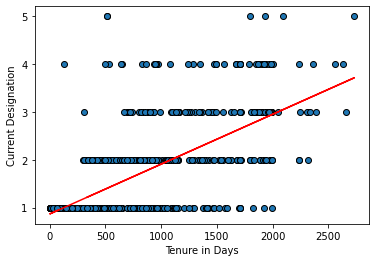

In [21]:
# scatter plot for all employees joining at des1, x axis tenure (days), y current designation
entry_level_df = new_df.loc[new_df['Joining Designation']== 1,:]
entry_level_df
print(f'Number of employees who joined at Designation 1: {len(entry_level_df)}')
x = entry_level_df['Tenure']
y = entry_level_df['Current_Designation']
plot_1 = plt.scatter(x, y, marker='o', edgecolors='k')
plt.xlabel('Tenure in Days')
plt.ylabel('Current Designation')

# expected positive linear correlation, which is somewhat true
# linear equation
(slope,intercept,rvalue,pvalue,stderror)=st.linregress(x,y)
all_regress_values = x*slope+intercept
plt.plot(x,all_regress_values,color='r')
r2 = rvalue**2
print(f'Correlation coefficient: {rvalue}')
print(r2)
plt.show()

0.7351838549981663
Correlation coefficient: 0.7351838549981663
0.5404953006499648


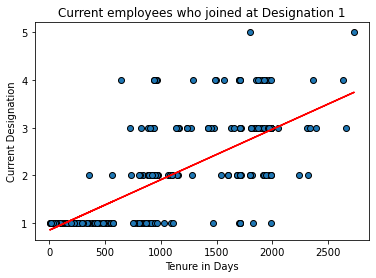

In [22]:
# same plot as above, but grouped by current status
x_current = entry_level_df[entry_level_df['Left_Company']==False]['Tenure']
y_current = entry_level_df[entry_level_df['Left_Company']==False]['Current_Designation']
plt.scatter(x_current, y_current, marker='o', edgecolors='k')
plt.xlabel('Tenure in Days')
plt.ylabel('Current Designation')
plt.title('Current employees who joined at Designation 1')

# similar to above plot
# linear equation
(slope,intercept,rvalue,pvalue,stderror)=st.linregress(x_current,y_current)
current_regress_values = x_current*slope+intercept
plt.plot(x_current,current_regress_values,color='r')
r2 = rvalue**2
print(rvalue)
print(f'Correlation coefficient: {rvalue}')
print(r2)
plt.show()

Correlation coefficient: 0.6488372792214805
0.42098981490753346


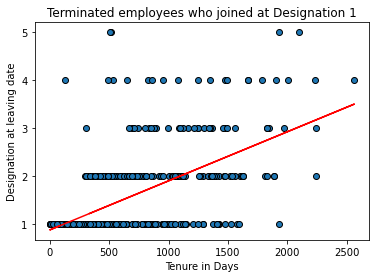

In [23]:
#  same plot as above, but grouped by terminated status
x_term = entry_level_df[entry_level_df['Left_Company']==True]['Tenure']
y_term = entry_level_df[entry_level_df['Left_Company']==True]['Current_Designation']
plt.scatter(x_term, y_term, marker='o', edgecolors='k')
plt.xlabel('Tenure in Days')
plt.ylabel('Designation at leaving date')
plt.title('Terminated employees who joined at Designation 1')

# is it more heavily weighted at the lower designations?
# less linear - but rvalue is still significant 
# earlier promotions (level 4)

# linear equation
(slope,intercept,rvalue,pvalue,stderror)=st.linregress(x_term,y_term)
term_regress_values = x_term*slope+intercept
plt.plot(x_term,term_regress_values,color='r')
r2 = rvalue**2
print(f'Correlation coefficient: {rvalue}')
print(r2)
plt.show()

In [24]:
# average tenure for all employees
aver_tenure = new_df['Tenure'].mean()
med_tenure = new_df['Tenure'].median()
print(aver_tenure,med_tenure)

437.11717765644687 192.0


In [25]:
# create df for terminated employees only
term_df = new_df.loc[new_df['Left_Company']== True,:]
print('term_df')
term_df

term_df


,Emp_ID,Dateofjoining,LastWorkingDate,Tenure,Left_Company,Start_date,End_date,Current_Designation,Joining Designation
0,1,2015-12-24,2016-03-11,78,True,2015-12-24,2016-03-11,1,1
2,4,2016-12-07,2017-04-27,141,True,2016-12-07,2017-04-27,2,2
3,5,2016-01-09,2016-03-07,58,True,2016-01-09,2016-03-07,1,1
5,8,2017-09-19,2017-11-15,57,True,2017-09-19,2017-11-15,3,3
7,12,2016-06-29,2016-12-21,175,True,2016-06-29,2016-12-21,1,1
...,...,...,...,...,...,...,...,...,...
2373,2779,2017-01-26,2017-02-14,19,True,2017-01-26,2017-02-14,3,3
2375,2782,2016-05-16,2016-08-16,92,True,2016-05-16,2016-08-16,1,1
2377,2785,2017-08-28,2017-10-28,61,True,2017-08-28,2017-10-28,1,1
2378,2786,2015-07-31,2016-09-22,419,True,2015-07-31,2016-09-22,2,2


In [26]:
# # create df for current employees only
current_df = new_df.loc[new_df['Left_Company']== False,:]
print('current_df')
current_df

current_df


,Emp_ID,Dateofjoining,LastWorkingDate,Tenure,Left_Company,Start_date,End_date,Current_Designation,Joining Designation
1,2,2017-11-06,NaN,55,False,2017-11-06,2017-12-31,2,2
4,6,2017-07-31,NaN,153,False,2017-07-31,2017-12-31,3,3
6,11,2017-12-07,NaN,24,False,2017-12-07,2017-12-31,1,1
9,14,2017-10-16,NaN,76,False,2017-10-16,2017-12-31,3,3
17,25,2014-10-30,NaN,1158,False,2014-10-30,2017-12-31,3,1
...,...,...,...,...,...,...,...,...,...
2370,2775,2017-10-02,NaN,90,False,2017-10-02,2017-12-31,3,3
2372,2778,2017-11-29,NaN,32,False,2017-11-29,2017-12-31,2,2
2374,2781,2017-02-17,NaN,317,False,2017-02-17,2017-12-31,2,2
2376,2784,2012-10-15,NaN,1903,False,2012-10-15,2017-12-31,3,2


In [27]:
# create one list each for terminated, current and all employee groups
# add mean and median tenure values to each list
# combine lists into df for summary statistics
term_list = []
current_list = []
all_list = []

term_list.append(term_df['Tenure'].mean())
term_list.append(term_df['Tenure'].median())
current_list.append(current_df['Tenure'].mean())
current_list.append(current_df['Tenure'].median())
all_list.append(new_df['Tenure'].mean())
all_list.append(new_df['Tenure'].median())



In [28]:
# plot average tenure: box plots

In [29]:
new_df['Current_Designation'].value_counts()

2    855
1    741
3    623
4    138
5     24
Name: Current_Designation, dtype: int64

In [30]:
# t_df = new_df.groupby(['Left_Company', 'Current_Designation'])
# t_df['Tenure'].mean()


In [31]:
# get mean & median tenure values per designation for terminated employees
term_gr_d = term_df.groupby('Current_Designation')
mnt_values = term_gr_d['Tenure'].mean().tolist()
mednt_values = term_gr_d['Tenure'].median().tolist()
sort_t = [mnt_values[0],mednt_values[0],mnt_values[1],mednt_values[1],\
                 mnt_values[2],mednt_values[2],mnt_values[3],mednt_values[3],\
                 mnt_values[4],mednt_values[4]]
term_list.extend(sort_t)
term_list

[357.71534653465346,
 176.0,
 276.81208053691273,
 179,
 329.12166666666667,
 170,
 375.4183976261128,
 150,
 1094.5,
 927,
 960.3076923076923,
 517]

In [32]:
# get mean & median tenure values per designation for current employees
current_gr_d = current_df.groupby('Current_Designation')
mnc_values = current_gr_d['Tenure'].mean().tolist()
mednc_values = current_gr_d['Tenure'].median().tolist()
sort_c = [mnc_values[0],mednc_values[0],mnc_values[1],mednc_values[1],\
                 mnc_values[2],mednc_values[2],mnc_values[3],mednc_values[3],\
                 mnc_values[4],mednc_values[4]]
current_list.extend(sort_c)
current_list

[604.8470588235294,
 242.0,
 409.49655172413793,
 256,
 454.0470588235294,
 181,
 545.8041958041958,
 190,
 1614.6029411764705,
 1875,
 1968.7272727272727,
 1980]

In [33]:
all_gr_d = new_df.groupby('Current_Designation')
mna_values = all_gr_d['Tenure'].mean().tolist()
medna_values = all_gr_d['Tenure'].median().tolist()
sort_a = [mna_values[0],medna_values[0],mna_values[1],medna_values[1],\
                 mna_values[2],medna_values[2],mna_values[3],medna_values[3],\
                 mna_values[4],medna_values[4]]
all_list.extend(sort_a)
all_list

[437.11717765644687,
 192.0,
 302.7759784075574,
 192,
 366.3801169590643,
 173,
 453.63723916532905,
 170,
 1350.7826086956522,
 1530,
 1422.5,
 1411]

In [34]:
# work in progress. Get help - list within list problem
summary_df = pd.DataFrame({'Past Employees':term_list,\
                           'Current Employees':current_list,\
                            'All Employees':all_list},
                            index=['Mean Tenure (days)','Median Tenure (days)',\
                                   'Mean Tenure Designation 1','Median Tenure Designation 1',\
                                  'Mean Tenure Designation 2','Median Tenure Designation 2',\
                                  'Mean Tenure Designation 3','Median Tenure Designation 3',\
                                  'Mean Tenure Designation 4','Median Tenure Designation 4',\
                                  'Mean Tenure Designation 5','Median Tenure Designation 5'])
summary_df

,Past Employees,Current Employees,All Employees
Mean Tenure (days),357.715347,604.847059,437.117178
Median Tenure (days),176.000000,242.000000,192.000000
Mean Tenure Designation 1,276.812081,409.496552,302.775978
Median Tenure Designation 1,179.000000,256.000000,192.000000
Mean Tenure Designation 2,329.121667,454.047059,366.380117
Median Tenure Designation 2,170.000000,181.000000,173.000000
Mean Tenure Designation 3,375.418398,545.804196,453.637239
Median Tenure Designation 3,150.000000,190.000000,170.000000
Mean Tenure Designation 4,1094.500000,1614.602941,1350.782609
Median Tenure Designation 4,927.000000,1875.000000,1530.000000


In [35]:
# anything useful from summary so far? 
# Is there a better way to visualise or group the data?
# Salary
# Performance - by quaterly rating
# Performance - by business value